<a href="https://colab.research.google.com/github/AnsimovDaniil/Deep_Learning_Course/blob/main/Ex_1_345867055.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
import matplotlib.pyplot as plt

In [8]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(120, activation='relu'),
  tf.keras.layers.Dense(84, activation='relu'),
  tf.keras.layers.Dense(10, tf.nn.softmax)
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
print(f'\nMODEL TRAINING:')
history = model.fit(training_images, training_labels, epochs=20, validation_data=((test_images, test_labels)))

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.5825 - accuracy: 0.7799 - val_loss: 0.4508 - val_accuracy: 0.8364
Epoch 2/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3952 - accuracy: 0.8541 - val_loss: 0.3770 - val_accuracy: 0.8611
Epoch 3/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3356 - accuracy: 0.8753 - val_loss: 0.3662 - val_accuracy: 0.8645
Epoch 4/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3011 - accuracy: 0.8880 - val_loss: 0.3201 - val_accuracy: 0.8827
Epoch 5/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2794 - accuracy: 0.8956 - val_loss: 0.3207 - val_accuracy: 0.8873
Epoch 6/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2576 - accuracy: 0.9028 - val_loss: 0.2980 - val_accuracy: 0.8894
Epoch 7/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2430 - accuracy: 0.9088 - v

In [10]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, 'relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(120, 'relu'),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(84, 'relu'),
  tf.keras.layers.Dense(10, tf.nn.softmax)
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
print(f'\nMODEL TRAINING:')
history_dropout = model.fit(training_images, training_labels, epochs=20, batch_size=32, validation_data=((test_images, test_labels)))

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.6111 - accuracy: 0.7684 - val_loss: 0.5527 - val_accuracy: 0.7708
Epoch 2/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4257 - accuracy: 0.8420 - val_loss: 0.4124 - val_accuracy: 0.8490
Epoch 3/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3706 - accuracy: 0.8635 - val_loss: 0.4031 - val_accuracy: 0.8583
Epoch 4/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3366 - accuracy: 0.8759 - val_loss: 0.3219 - val_accuracy: 0.8832
Epoch 5/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3124 - accuracy: 0.8838 - val_loss: 0.3114 - val_accuracy: 0.8843
Epoch 6/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2950 - accuracy: 0.8902 - val_loss: 0.3173 - val_accuracy: 0.8831
Epoch 7/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2825 - accuracy: 0.8963 - v

In [12]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(0.0008)),  
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(16, (5, 5), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0008)),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.0008)),
  tf.keras.layers.Dense(120, 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.0008)),
  tf.keras.layers.Dense(84, 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.0008)),
  tf.keras.layers.Dense(10, tf.nn.softmax)
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_L2 = model.fit(training_images, training_labels, epochs=20, batch_size=256, validation_data=((test_images, test_labels)))

Epoch 1/20
235/235 [==============================] - 21s 82ms/step - loss: 1.0836 - accuracy: 0.6859 - val_loss: 0.8023 - val_accuracy: 0.7804
Epoch 2/20
235/235 [==============================] - 20s 85ms/step - loss: 0.7192 - accuracy: 0.8062 - val_loss: 0.6978 - val_accuracy: 0.8070
Epoch 3/20
235/235 [==============================] - 19s 81ms/step - loss: 0.6450 - accuracy: 0.8281 - val_loss: 0.6255 - val_accuracy: 0.8380
Epoch 4/20
235/235 [==============================] - 19s 80ms/step - loss: 0.5900 - accuracy: 0.8444 - val_loss: 0.5973 - val_accuracy: 0.8335
Epoch 5/20
235/235 [==============================] - 20s 83ms/step - loss: 0.5522 - accuracy: 0.8546 - val_loss: 0.5472 - val_accuracy: 0.8563
Epoch 6/20
235/235 [==============================] - 18s 79ms/step - loss: 0.5222 - accuracy: 0.8624 - val_loss: 0.5379 - val_accuracy: 0.8564
Epoch 7/20
235/235 [==============================] - 19s 83ms/step - loss: 0.5019 - accuracy: 0.8678 - val_loss: 0.5112 - val_accuracy:

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(120, 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(84, 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, tf.nn.softmax)
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_BatchNorm = model.fit(training_images, training_labels, epochs=20, batch_size=256, validation_data=((test_images, test_labels)))

Epoch 1/20
235/235 [==============================] - 28s 110ms/step - loss: 0.4978 - accuracy: 0.8225 - val_loss: 1.7974 - val_accuracy: 0.3480
Epoch 2/20
235/235 [==============================] - 25s 108ms/step - loss: 0.3287 - accuracy: 0.8785 - val_loss: 0.7912 - val_accuracy: 0.7091
Epoch 3/20
235/235 [==============================] - 25s 108ms/step - loss: 0.2889 - accuracy: 0.8921 - val_loss: 0.3522 - val_accuracy: 0.8743
Epoch 4/20
235/235 [==============================] - 25s 107ms/step - loss: 0.2624 - accuracy: 0.9006 - val_loss: 0.3581 - val_accuracy: 0.8719
Epoch 5/20
235/235 [==============================] - 25s 106ms/step - loss: 0.2407 - accuracy: 0.9094 - val_loss: 0.3300 - val_accuracy: 0.8780
Epoch 6/20
235/235 [==============================] - 27s 113ms/step - loss: 0.2264 - accuracy: 0.9145 - val_loss: 0.3231 - val_accuracy: 0.8804
Epoch 7/20
235/235 [==============================] - 25s 107ms/step - loss: 0.2091 - accuracy: 0.9194 - val_loss: 0.3481 - val_ac

In [16]:
x = range(20)

<ipython-input-17-b012ee7b6795>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)


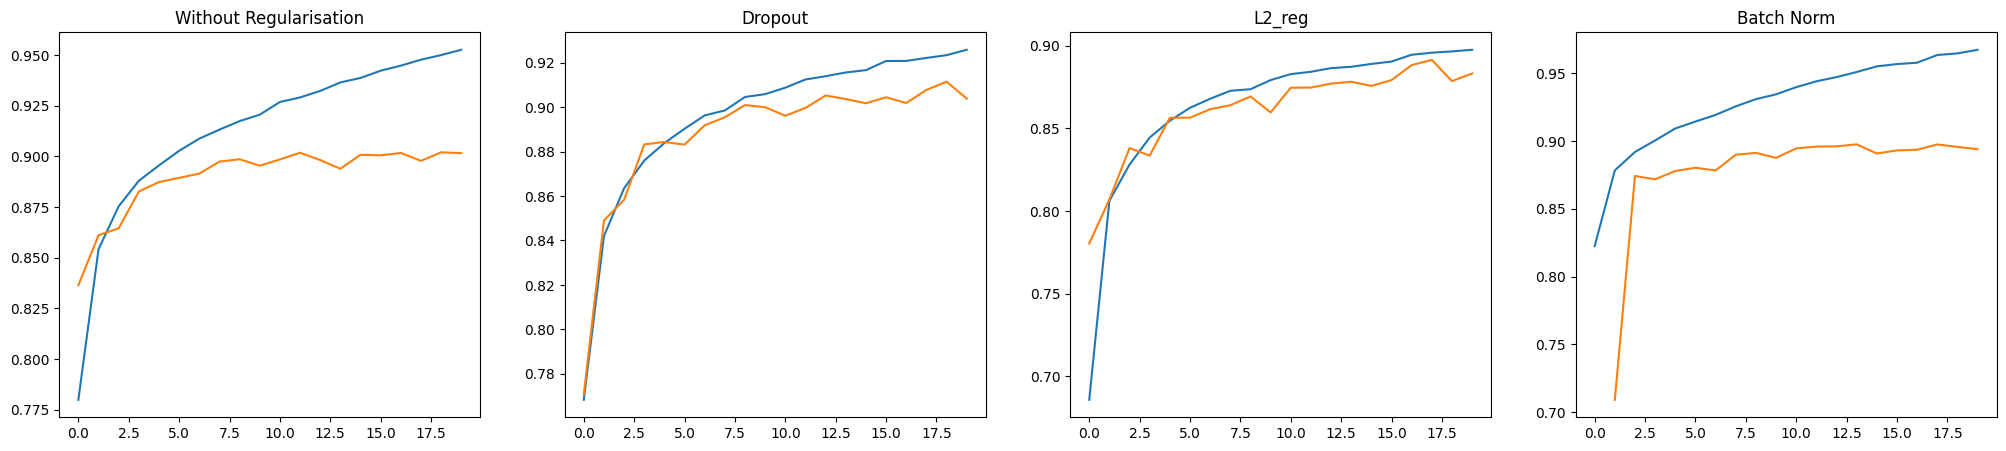

In [17]:
plt.xlabel('epoch')
plt.ylabel('accuracy')
fig = plt.gcf()
fig.set_size_inches(25, 5)
plt.subplot(141)
plt.title("Without Regularisation")
plt.plot(x, history.history['accuracy'], x,  history.history['val_accuracy'])
plt.subplot(142)
plt.title("Dropout")
plt.plot(x, history_dropout.history['accuracy'], x, history_dropout.history['val_accuracy'])
plt.subplot(143)
plt.title("L2_reg")
plt.plot(x, history_L2.history['accuracy'], x, history_L2.history['val_accuracy'])
plt.subplot(144)
plt.title("Batch Norm")
plt.plot(x, history_BatchNorm.history['accuracy'], x[1:20],  history_BatchNorm.history['val_accuracy'][1:20])

\begin{array}{ccc}
Type&Regular&Dropout&L2Reg&BatchNorm\\
Train:Test&95:90&92.5:90&90:88&97:90
\end{array}